<a href="https://colab.research.google.com/github/SanchitVj1799/credit_card_fraud_detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras import Sequential

In [0]:
data = pd.read_csv('/content/drive/My Drive/Datasets/creditcard.csv')

In [4]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

## Exploratory Data Analysis

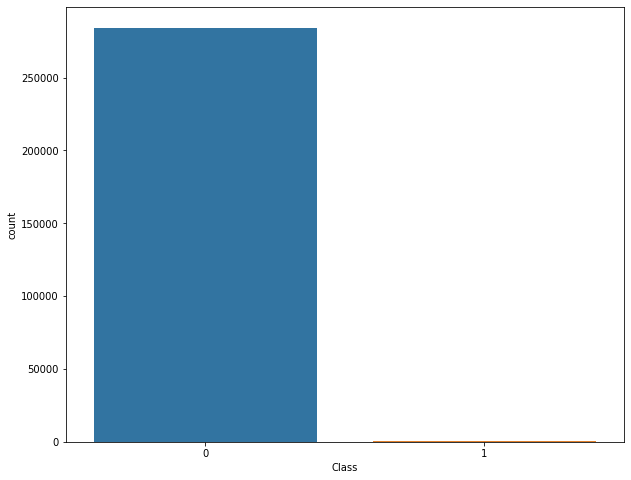

In [10]:
plt.figure(figsize = (10,8))
sns.countplot(data=data, x='Class')

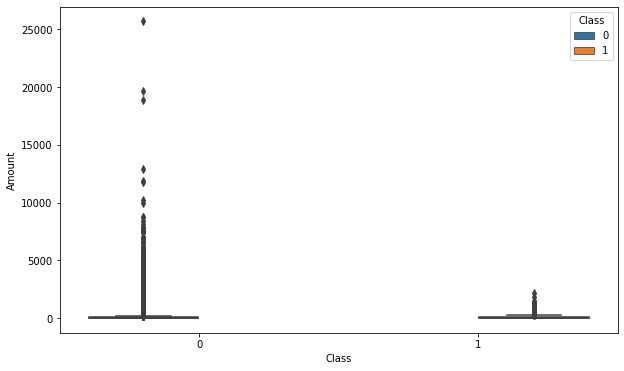

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Class', y = 'Amount', data = data, hue = 'Class')

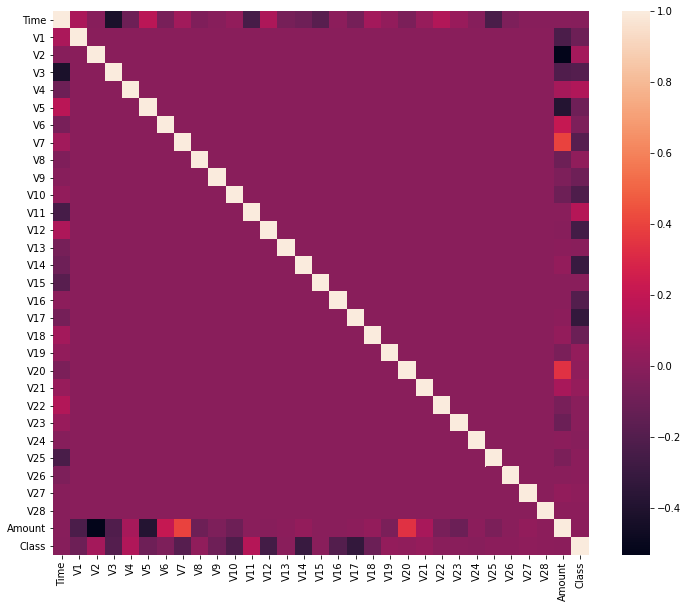

In [12]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr)

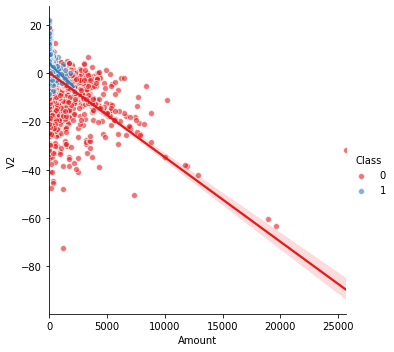

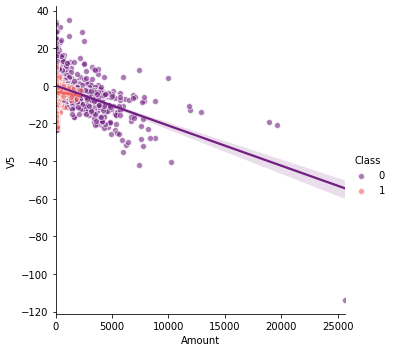

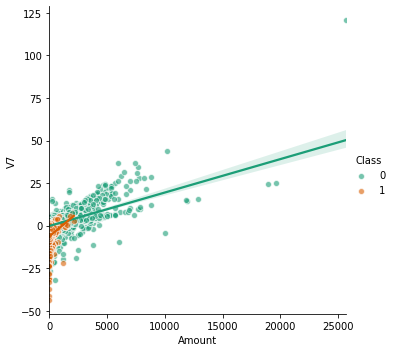

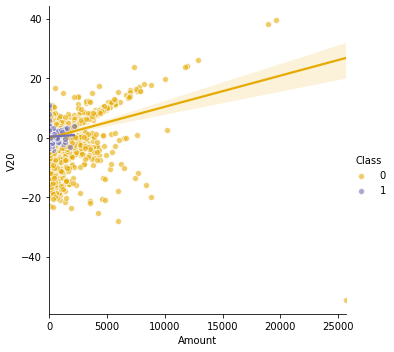

In [13]:
sns.lmplot(x = 'Amount', y = 'V2', data = data, hue = 'Class', palette = 'Set1', fit_reg=True, scatter_kws={'edgecolor':'white', 'alpha':0.6, 'linewidths':1})
sns.lmplot(x = 'Amount', y = 'V5', data = data, hue = 'Class', palette = 'magma', fit_reg=True, scatter_kws={'edgecolor':'white', 'alpha':0.6, 'linewidths':1})
sns.lmplot(x = 'Amount', y = 'V7', data = data, hue = 'Class', palette = 'Dark2', fit_reg=True, scatter_kws={'edgecolor':'white', 'alpha':0.6, 'linewidths':1})
sns.lmplot(x = 'Amount', y = 'V20', data = data, hue = 'Class', palette = 'Dark2_r', fit_reg=True, scatter_kws={'edgecolor':'white', 'alpha':0.6, 'linewidths':1})

Text(0.5, 1.0, 'Time')

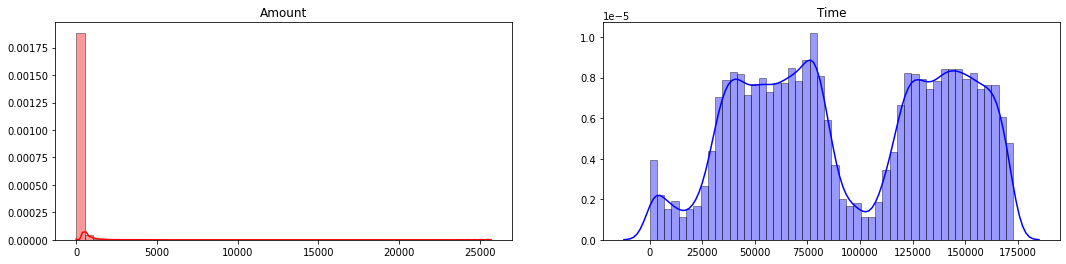

In [14]:
amount = data['Amount'].values
time = data['Time'].values
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(18, 4))
sns.distplot(amount, ax = ax1, color = 'r', hist_kws={'edgecolor':'black'})
ax1.set_title('Amount')
sns.distplot(time, ax = ax2, color = 'b', hist_kws={'edgecolor':'black'})
ax2.set_title('Time')

## Data Preparation

### Treating Uneven Class Distribution

Dividing data into features and labels

In [15]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
data = data.sample(frac=1)
fraud = data.loc[data['Class'] == 1]
not_fraud = data.loc[data['Class'] == 0][ : 492]
data = pd.concat([fraud, not_fraud])
data = data.sample(frac=1, random_state=123)
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
240222,150494.0,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,-0.373927,-0.688454,-1.463207,-1.624155,-4.252466,-1.340176,1.732873,2.934481,1.437197,-1.923309,-0.288392,-0.157869,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,1.00,1
139645,83268.0,0.030898,0.769005,-1.178818,0.562174,2.699985,3.403082,0.433206,0.755293,-0.982417,-0.325674,0.158680,-0.528167,-0.024463,-0.493615,1.740485,-0.089505,0.582882,1.019808,1.611060,0.426457,0.026121,-0.112395,0.036307,0.907676,-0.121099,-0.203133,0.124021,0.117941,79.62,0
17380,28669.0,1.275854,-0.760901,1.069438,-0.746144,-1.381466,-0.055642,-1.215858,0.219684,-0.646175,0.738758,1.750424,0.104749,-0.017740,-0.173880,0.671870,1.332436,0.168401,-0.850460,0.079064,0.049338,0.471346,1.306140,-0.056729,0.274793,0.291123,-0.049329,0.049379,0.013843,11.00,0


In [17]:
data.shape

(984, 31)

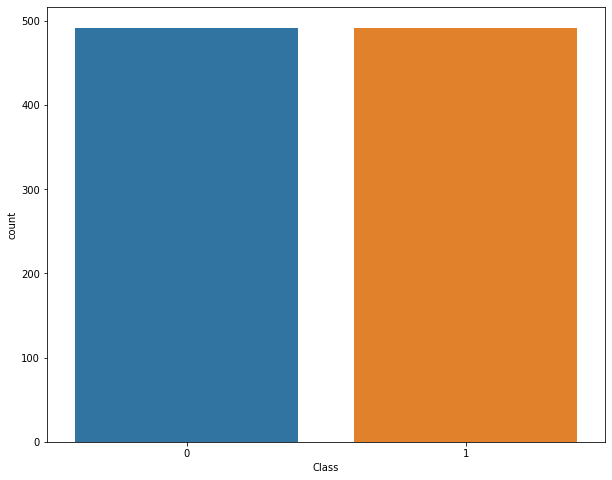

In [18]:
plt.figure(figsize = (10,8))
sns.countplot(data=data, x='Class')

In [0]:
X = data.drop(['Class'], axis = 1).values
y = data['Class'].values

In [20]:
print(X.shape)

(984, 30)


### Splitting and Preprocessing Data

Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)

Preprocessing

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Not using PCA here because of loss of valuable information due to dimensionality reduction.

## Time to Train Models

### Machine Learning Methods

Logistic regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', lr.score(X_train, y_train))
print('Test Score : ', lr.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       148
           1       0.96      0.92      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix
 [[143   5]
 [ 12 136]]
Training Score :  0.9534883720930233
Test Score :  0.9425675675675675


Support Vector Classification

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', svc.score(X_train, y_train))
print('Test Score : ', svc.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       148
           1       0.97      0.89      0.93       148

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296

Confusion Matrix
 [[144   4]
 [ 16 132]]
Training Score :  0.9578488372093024
Test Score :  0.9324324324324325


Decision Tree Classification

In [25]:
dt = DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 4, random_state=123 )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', dt.score(X_train, y_train))
print('Test Score : ', dt.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       148
           1       0.94      0.92      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix
 [[139   9]
 [ 12 136]]
Training Score :  0.9549418604651163
Test Score :  0.9290540540540541


Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(max_depth= 6, min_samples_leaf= 6, random_state=123)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', rfc.score(X_train, y_train))
print('Test Score : ', rfc.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       148
           1       0.98      0.91      0.94       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Confusion Matrix
 [[145   3]
 [ 13 135]]
Training Score :  0.9549418604651163
Test Score :  0.9459459459459459


AdaBoost Classifier

In [27]:
adb = AdaBoostClassifier(base_estimator= rfc, n_estimators=50, random_state=123)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', adb.score(X_train, y_train))
print('Test Score : ', adb.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       148
           1       0.98      0.92      0.95       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Confusion Matrix
 [[145   3]
 [ 12 136]]
Training Score :  0.9912790697674418
Test Score :  0.9493243243243243


Gradient Boosting Classification

In [28]:
gdb = GradientBoostingClassifier(n_estimators= 50, max_depth= 2, min_samples_leaf= 10, random_state=123)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)
print('Classification Report\n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Training Score : ', gdb.score(X_train, y_train))
print('Test Score : ', gdb.score(X_test, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       148
           1       0.96      0.92      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix
 [[143   5]
 [ 12 136]]
Training Score :  0.9694767441860465
Test Score :  0.9425675675675675


### Deep Learning Method

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience= 4, verbose= 0, mode = 'min')

In [31]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test), callbacks= [early_stop])

Epoch 1/20
22/22 [==============================] - 0s 13ms/step - loss: 0.5819 - accuracy: 0.6890 - val_loss: 0.3496 - val_accuracy: 0.9122
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8576 - val_loss: 0.2348 - val_accuracy: 0.9155
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.9026 - val_loss: 0.2001 - val_accuracy: 0.9223
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.8953 - val_loss: 0.1830 - val_accuracy: 0.9324
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.9186 - val_loss: 0.1750 - val_accuracy: 0.9358
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9186 - val_loss: 0.1731 - val_accuracy: 0.9493
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9273 - val_loss: 0.1737 - val_accuracy: 0.9493
Epoch 8/20
22/22 [=

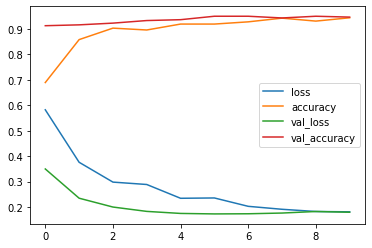

In [32]:
loss = pd.DataFrame(model.history.history)
loss.plot()